Step 1: Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


Step 2: Load the Dataset

In [38]:
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
df = pd.read_csv(url)
print(df.shape)
print(df.columns)

(1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [39]:
"""# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Show the first 5 rows to get an overview
df.head()"""



"# Load the dataset\ndf = pd.read_csv('StudentsPerformance.csv')\n\n# Show the first 5 rows to get an overview\ndf.head()"

In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [41]:
print(df.shape[1])

8


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Step 3: Exploratory Data Analysis (EDA)

In [44]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [45]:
# Get basic descriptive statistics
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


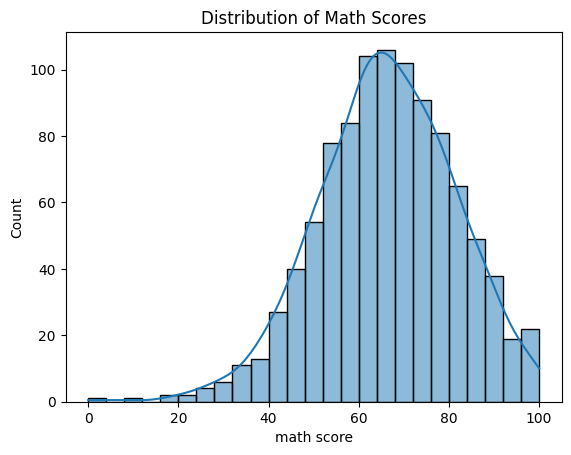

In [46]:
# Visualize the correlation between numeric features (Math, Reading, Writing scores)


# Check the distribution of scores
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()


In [47]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [48]:
df[['math score', 'reading score',
       'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


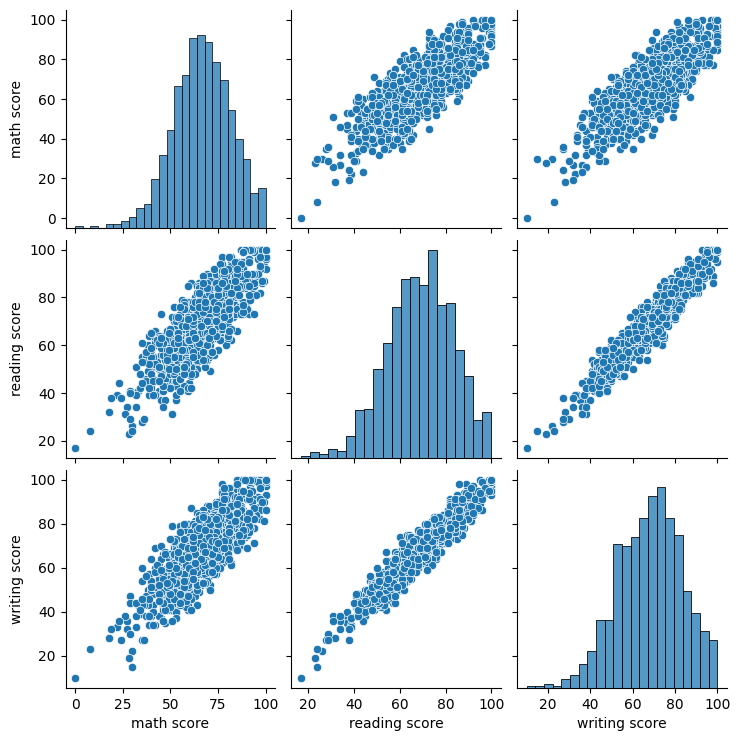

In [49]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

1. Check Linearity:

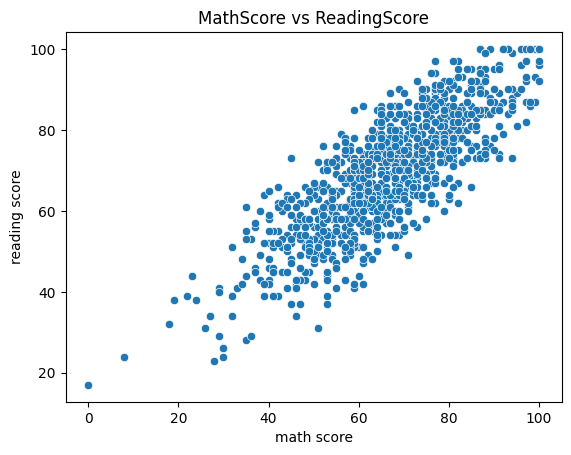

In [50]:
# Or scatter plot for a specific feature
sns.scatterplot(data=df, x='math score', y='reading score')
plt.title("MathScore vs ReadingScore")
plt.show()


In [51]:
df.select_dtypes('O').columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [52]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [53]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Step 4: Data Preprocessing

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for "parental level of education"
le = LabelEncoder()
df["parental level of education"] = le.fit_transform(df["parental level of education"])

# Show the transformed data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,standard,none,72,72,74
1,female,group C,4,standard,completed,69,90,88
2,female,group B,3,standard,none,90,95,93
3,male,group A,0,free/reduced,none,47,57,44
4,male,group C,4,standard,none,76,78,75


In [55]:
df["parental level of education"].unique()

array([1, 4, 3, 0, 2, 5])

In [56]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [57]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [58]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [59]:
# List of nominal categorical columns (no natural order)
nominal_columns = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']

# One-hot encode nominal variables and drop the first category to avoid dummy variable trap
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True).astype(int)

In [60]:
display(df)

,parental level of education,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,1,72,72,74,0,1,0,0,0,1,1
1,4,69,90,88,0,0,1,0,0,1,0
2,3,90,95,93,0,1,0,0,0,1,1
3,0,47,57,44,1,0,0,0,0,0,1
4,4,76,78,75,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,3,88,99,95,0,0,0,0,1,1,0
996,2,62,55,55,1,0,1,0,0,0,1
997,2,59,71,65,0,0,1,0,0,0,0
998,4,68,78,77,0,0,0,1,0,1,0


In [61]:
##4.2 Split the Data into Features and Target
# Features (X) and Target (y)
X = df.drop('math score', axis=1)
y = df['math score']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


     parental level of education  reading score  writing score  gender_male  \
29                             3             70             75            0   
535                            1             83             83            0   
695                            4             89             86            0   
557                            3             67             66            1   
836                            2             64             57            1   
..                           ...            ...            ...          ...   
106                            3            100            100            0   
270                            1             63             61            1   
860                            0             62             53            0   
435                            4             48             53            1   
102                            0             91             89            0   

     race/ethnicity_group B  race/ethnicity_group C

In [62]:
X_train

array([[ 0.29665852,  0.03079054,  0.43405338, ..., -0.41181385,
         0.72776144,  0.73178456],
       [-0.80207674,  0.9302895 ,  0.96470125, ..., -0.41181385,
        -1.37407665, -1.36652242],
       [ 0.84602615,  1.34544287,  1.1636942 , ..., -0.41181385,
        -1.37407665,  0.73178456],
       ...,
       [-1.35144437, -0.52274728, -1.02522827, ..., -0.41181385,
         0.72776144,  0.73178456],
       [ 0.84602615, -1.49143847, -1.02522827, ..., -0.41181385,
        -1.37407665, -1.36652242],
       [-1.35144437,  1.48382733,  1.36268716, ..., -0.41181385,
         0.72776144,  0.73178456]])

In [63]:
X_test

array([[-1.35144437,  1.13786619,  1.03103224, ..., -0.41181385,
         0.72776144,  0.73178456],
       [ 0.84602615, -0.24597837,  0.30139141, ..., -0.41181385,
        -1.37407665, -1.36652242],
       [-0.80207674,  0.23836723,  0.23506043, ..., -0.41181385,
         0.72776144,  0.73178456],
       ...,
       [ 0.84602615,  0.79190505,  0.50038436, ..., -0.41181385,
        -1.37407665,  0.73178456],
       [-1.35144437,  0.51513614,  0.36772239, ..., -0.41181385,
         0.72776144,  0.73178456],
       [ 1.39539378,  0.30755945,  0.23506043, ..., -0.41181385,
         0.72776144, -1.36652242]])

Step 5: Model Building - Random Forest Regressor

In [64]:
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [65]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [66]:
print("Shape of y:", y_test.shape)  # Should be (1000,)
print("Shape of y_pred:", y_pred.shape)  # Should also be (1000,)

Shape of y: (200,)
Shape of y_pred: (200,)


Step 6: Evaluate the Model

Mean Absolute Error (MAE): 4.716805357142857
Mean Squared Error (MSE): 37.02293676169217


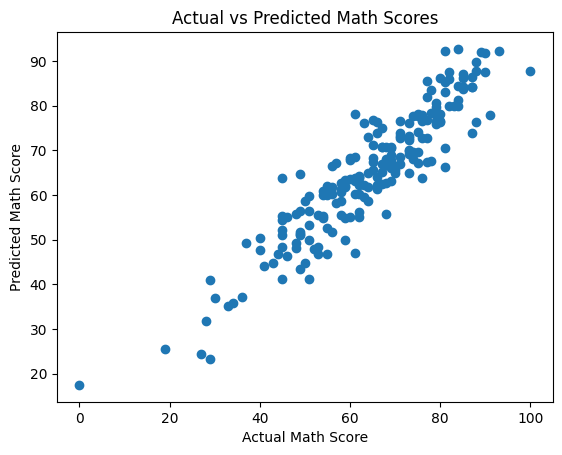

In [67]:
# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Plot actual vs predicted Math Scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.show()



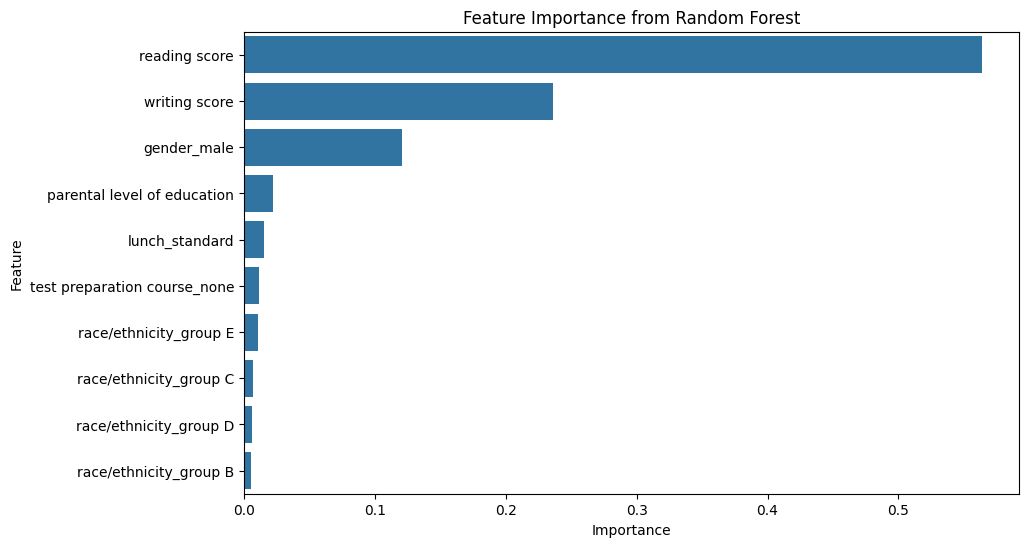

                        Feature  Importance
1                 reading score    0.563692
2                 writing score    0.236040
3                   gender_male    0.120801
0   parental level of education    0.022468
8                lunch_standard    0.015810
9  test preparation course_none    0.011649
7        race/ethnicity_group E    0.011027
5        race/ethnicity_group C    0.007199
6        race/ethnicity_group D    0.005938
4        race/ethnicity_group B    0.005376


In [68]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Print feature importances
print(feature_importance_df)


3. Check Homoscedasticity:

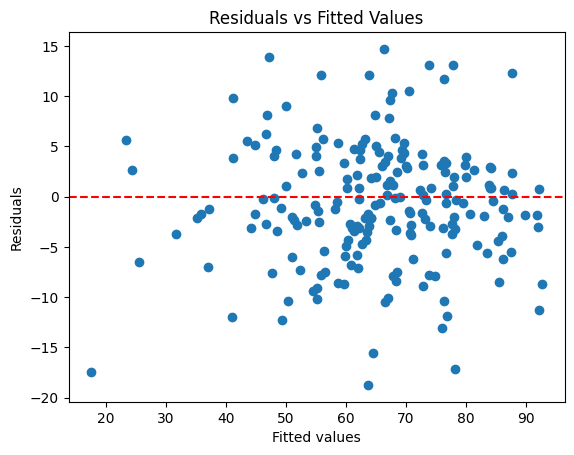

In [69]:
# Residuals
y = np.array(y)
residuals = y_test  - y_pred

# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [70]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Step 7: Interpretation of Results
MAE and MSE values will give you an idea of how well your model is predicting the Math Score.
A scatter plot of actual vs. predicted scores helps visually assess how closely the predictions match the true values.